# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

### 2.1 Normalization

In [2]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm

In [3]:
def min4norm(Data):
    _min = Data.min(axis=0, keepdims = True)
    return _min

In [4]:
def max4norm(Data):
    _max = Data.max(axis=0, keepdims = True)
    return _max

### 2.2 วัดระยะห่างระหว่างข้อมูลแต่ละตัวใน Validation Set กับข้อมูลทุกตัวใน Training Set

In [5]:
def KNN_find_distance_each_data(X_Train, X_Valid):
    all_distance = []
    for x_valid in X_Valid:
        distance = KNN_find_distance(X_Train, x_valid)
        all_distance.append(distance)
    return all_distance

In [6]:
def KNN_find_distance(X_Train, x_valid):
    distance2 = ((X_Train - x_valid)**2).sum(axis=1)
    distance = np.sqrt(distance2)
    return distance

### 2.3 เรียงลำดับ Target ตามระยะห่าง

In [7]:
def KNN_find_sorted_target_each_data(Y_Train, all_distance):
    all_sorted_target = []
    for distance in all_distance:
        sorted_target = KNN_sort_target_by_distance(Y_Train, distance)
        all_sorted_target.append(sorted_target)
    return all_sorted_target

In [8]:
def KNN_sort_target_by_distance(Y_Train, distance):
    sorted_target = Y_Train[distance.argsort()]
    return sorted_target

### 2.4 หาผลลัพธ์จากเพื่อนบ้านที่ใกล้ที่สุด K ตัว

#### 2.4.1 KNN-C

In [9]:
def KNNC_find_class_each_data(all_sorted_target, K):
    all_class = []
    for sorted_target in all_sorted_target:
        _class = KNNC_find_class(sorted_target, K)
        all_class.append(_class)
    all_class = np.array(all_class).reshape(-1, 1)
    return all_class

In [10]:
def KNNC_find_class(sorted_target, K):
    unique, count_unique = np.unique(sorted_target[:K, :], return_counts = True)
    _class = unique[count_unique.argmax()]
    return _class

#### 2.4.2 KNN-R

In [11]:
def KNNR_find_value_each_data(all_sorted_target, K):
    all_value = []
    for sorted_target in all_sorted_target:
        value = KNNR_find_value(sorted_target, K)
        all_value.append(value)
    all_value = np.array(all_value).reshape(-1, 1)
    return all_value

In [12]:
def KNNR_find_value(sorted_target, K):
    value = sorted_target[:K, :].mean()
    return value

### 2.5 หา error ของ K แต่ละค่า และ หา K ที่ทำให้ error บน Validation Set ต่ำที่สุด

#### 2.5.1 KNN-C

In [13]:
def KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_class = KNNC_find_class_each_data(all_sorted_target, K)
        K_error = find_error_classification(Y_Valid, K_all_class)
        error_list.append(K_error)
    return K_list, error_list

In [14]:
def find_error_classification(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

#### 2.5.2 KNN-R

In [15]:
def KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_value = KNNR_find_value_each_data(all_sorted_target, K)
        K_error = find_MAE(Y_Valid, K_all_value)
        error_list.append(K_error)
    return K_list, error_list

In [16]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [17]:
def KNN_find_best_K(K_list, error_list):
    K_list = np.array(K_list)
    error_list = np.array(error_list)
    plt.plot(K_list, error_list)
    plt.xlabel('K')
    plt.ylabel('Error')
    sorted_K = K_list[error_list.argsort()]
    error_list.sort()
    best_K = sorted_K[0]
    print(best_K)
    print()
    L = len(K_list)
    for l in range(L):
        print('K :', sorted_K[l], ', error :', error_list[l])
    return best_K

### 2.6 เรียนรู้

#### 2.6.1 KNN-C

In [18]:
def KNNC_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

#### 2.6.2 KNN-R

In [19]:
def KNNR_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

### 2.7 พยากรณ์

#### 2.7.1 KNN-C

In [20]:
def KNNC_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    #all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Test_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNC_find_class_each_data(all_sorted_target, best_K)
    return Yhat_Test

#### 2.7.2 KNN-R

In [21]:
def KNNR_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    #all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Test_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNR_find_value_each_data(all_sorted_target, best_K)
    return Yhat_Test

# 3. Read Data & Prepare Data

In [22]:
Data = pd.read_excel('EURUSD_D1_Dataset_Regression.xlsx', usecols = 'N:AD', skiprows = range(5))

In [23]:
Data

,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1.13009,1.14506,1.14438,1.15077,1.15366,1.12014,1.12723,1.13265,1.13006,1.14346,1.144792,1.130708,1.157813,1.124715,1.14888,1.16229,1.14888
1,1.14506,1.14438,1.15077,1.15366,1.16229,1.12723,1.13265,1.13006,1.14346,1.14888,1.139891,1.127185,1.158828,1.134312,1.15357,1.15739,1.14620
2,1.14438,1.15077,1.15366,1.16229,1.15739,1.13265,1.13006,1.14346,1.14888,1.14620,1.141614,1.127200,1.160360,1.135908,1.15120,1.15370,1.14667
3,1.15077,1.15366,1.16229,1.15739,1.15370,1.13006,1.14346,1.14888,1.14620,1.14667,1.142536,1.129017,1.154614,1.146826,1.14913,1.14967,1.13744
4,1.15366,1.16229,1.15739,1.15370,1.14967,1.14346,1.14888,1.14620,1.14667,1.13744,1.145281,1.129365,1.159082,1.137762,1.13775,1.15766,1.13675
5,1.16229,1.15739,1.15370,1.14967,1.15766,1.14888,1.14620,1.14667,1.13744,1.13675,1.148074,1.134063,1.162811,1.137345,1.16564,1.17353,1.16205
6,1.15739,1.15370,1.14967,1.15766,1.17353,1.14620,1.14667,1.13744,1.13675,1.16205,1.152813,1.139002,1.170288,1.134424,1.16520,1.17146,1.15998
7,1.15370,1.14967,1.15766,1.17353,1.17146,1.14667,1.13744,1.13675,1.16205,1.15998,1.154338,1.141401,1.179035,1.133353,1.16989,1.17437,1.16610
8,1.14967,1.15766,1.17353,1.17146,1.17437,1.13744,1.13675,1.16205,1.15998,1.16610,1.154126,1.143158,1.182779,1.136713,1.16654,1.17266,1.16181
9,1.15766,1.17353,1.17146,1.17437,1.17266,1.13675,1.16205,1.15998,1.16610,1.16181,1.152640,1.141252,1.175259,1.156477,1.16877,1.18363,1.16635


In [24]:
DataMatrix = Data.values

In [25]:
DataMatrix.shape

(4232, 17)

In [26]:
number_of_target = 2

In [27]:
D = DataMatrix.shape[1] - number_of_target

In [28]:
X = DataMatrix[:, :D]
High = DataMatrix[:, D:D+1]
Low = DataMatrix[:, D+1:]

In [29]:
start_train = 0
end_train = -300
end_valid = -150
# end_test = -1

In [30]:
X_Train = X[start_train:end_train, :]
High_Train = High[start_train:end_train, :]
Low_Train = Low[start_train:end_train, :]

X_Valid = X[end_train:end_valid, :]
High_Valid = High[end_train:end_valid, :]
Low_Valid = Low[end_train:end_valid, :]

X_Test = X[end_valid:, :]
High_Test = High[end_valid:, :]
Low_Test = Low[end_valid:, :]

# 4. Create Model

4

K : 4 , error : 0.003939749999999882
K : 11 , error : 0.003965248484848088
K : 10 , error : 0.00397993333333288
K : 13 , error : 0.003983420512820097
K : 12 , error : 0.003987449999999551
K : 3 , error : 0.004022244444444733
K : 14 , error : 0.0040274761904756425
K : 5 , error : 0.00403444000000011
K : 9 , error : 0.004060481481480993
K : 15 , error : 0.004099586666666274
K : 7 , error : 0.004127304761904457
K : 8 , error : 0.00413940833333297
K : 16 , error : 0.00414794583333283
K : 17 , error : 0.0041780784313719555
K : 6 , error : 0.004240477777777455
K : 18 , error : 0.004247133333332719
K : 19 , error : 0.004265799999999544
K : 20 , error : 0.004286933333332703
K : 21 , error : 0.0043315682539676135
K : 22 , error : 0.004371466666666121
K : 23 , error : 0.00438663768115887
K : 24 , error : 0.004434661111110554
K : 27 , error : 0.004442148148147587
K : 26 , error : 0.004456071794871231
K : 28 , error : 0.004482557142856615
K : 25 , error : 0.004483575999999448
K : 29 , error : 0

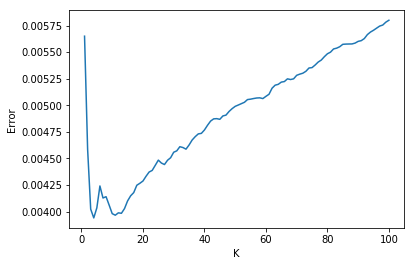

In [31]:
best_K = KNNR_fit(X_Train, High_Train, X_Valid, High_Valid, 1, 100)

# 5. Make Prediction

In [32]:
Highhat_Test = KNNR_predict(X_Train, High_Train, X_Test, best_K)

In [33]:
error_Test = find_MAE(High_Test, Highhat_Test)

In [34]:
error_Test

0.0035636333333333202

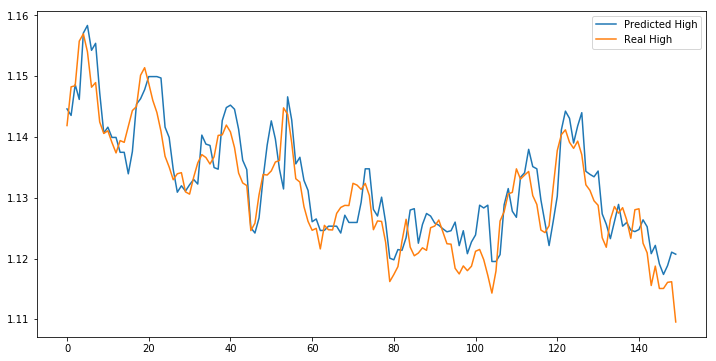

In [35]:
fig = plt.figure(figsize = (12, 6))
plt.plot(Highhat_Test, label = 'Predicted High')
plt.plot(High_Test, label = 'Real High')
plt.legend()

18

K : 18 , error : 0.003058448148148223
K : 16 , error : 0.0030640666666668257
K : 15 , error : 0.003072022222222463
K : 17 , error : 0.003073137254902124
K : 19 , error : 0.0030976842105265353
K : 14 , error : 0.003106323809523818
K : 20 , error : 0.0031391333333336434
K : 22 , error : 0.0031417393939396866
K : 13 , error : 0.003156528205128398
K : 21 , error : 0.003158526984127241
K : 23 , error : 0.003162634782608853
K : 11 , error : 0.0031699454545456914
K : 39 , error : 0.003177119658119912
K : 12 , error : 0.0031771277777780252
K : 38 , error : 0.0031782491228073127
K : 26 , error : 0.003181587179487333
K : 24 , error : 0.003182819444444608
K : 28 , error : 0.0031858928571430506
K : 33 , error : 0.003186383838384074
K : 31 , error : 0.003186574193548566
K : 37 , error : 0.0031879855855858484
K : 27 , error : 0.0031915185185186806
K : 40 , error : 0.0031928800000002584
K : 41 , error : 0.003193386991870192
K : 25 , error : 0.003195181333333526
K : 32 , error : 0.0031953979166668

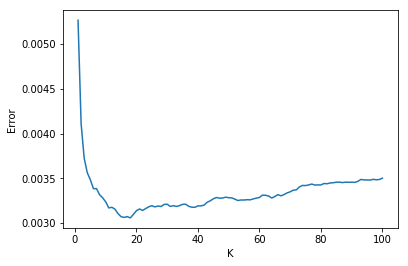

In [36]:
best_K = KNNR_fit(X_Train, High_Train, X_Test, High_Test, 1, 100)